In [1]:
import os
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

from data import loader_train, loader_val, loader_test
from train import train_model
from models import RadiographyClassifier

In [2]:
from data import contrast_transform
# Plot an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    img = contrast_transform(img)
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()
    

c:\Users\34658\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\34658\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([ 1.1822, -0.0422,  0.1970,  0.6339, -0.5300],
       grad_fn=<SelectBackward0>)


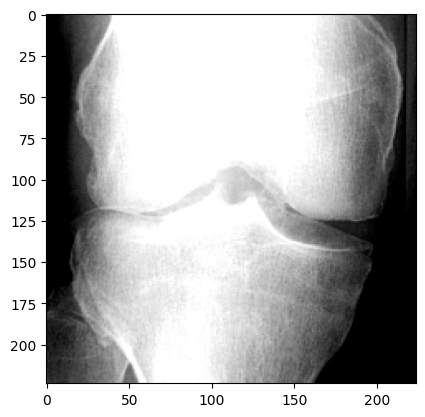

tensor(3)


In [3]:
# Iteración de prueba para ver imágenes y sus clasificaciones
train_loader = loader_train



model = RadiographyClassifier(5)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Imprimir la etiqueta real y la etiqueta predicha
model.eval()  # Establecer el modelo en modo de evaluación

for inputs, labels in train_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    print(outputs[0])
    imshow(torchvision.utils.make_grid(inputs[0]))
    print(labels[0])

    break


In [4]:
#train a model
model = RadiographyClassifier(5)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_model(model, loader_train, loader_val, criterion, optimizer, device, num_epochs=10)

Epoch 0/9
----------


Training Epoch [1/10]:  43%|██████████████████▋                        | 314/724 [02:01<02:38,  2.59it/s, train_acc=0.34832803, train_loss=2.07433072]


KeyboardInterrupt: 